In [1]:
%%time
import vaex
import pandas as pd

CPU times: total: 2.73 s
Wall time: 8.39 s


# Sampling Healthkathon

Sampling_Healthkathon, merupakan data kunjungan peserta JKN ke fasilitas kesehatan rujukan tingkat lanjut

In [43]:
%%time

df = vaex.from_csv('sampling_healtkathon2022.csv', convert=True, chunk_size=100_000)

CPU times: total: 15.6 ms
Wall time: 54 ms


### Cek Data

In [ ]:
df[df['politujuan'].isna()].head(10)  # type: ignore # Menampilkan 10 baris pertama


#,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,1010828,520,17,A,63,L,1,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,1.06284e+07,1,D-4-13-III,1,--,--,--,--,--,0
1,1025249,663,17,A,49,P,1,2018-10-06T17:00:00.000Z,2018-10-14T17:00:00.000Z,1,--,K28.0,8.3097e+06,1,D-4-13-II,1,--,--,--,--,--,0
2,176799,739,19,C,61,L,1,2020-09-28T17:00:00.000Z,2020-10-01T17:00:00.000Z,1,--,M06.0,2.9326e+06,1,M-4-18-I,1,--,--,--,--,--,0
3,1011990,1701,17,A,23,L,1,2018-06-14T17:00:00.000Z,2018-06-27T17:00:00.000Z,1,--,C91.0,5.6761e+06,1,D-4-11-I,3,--,--,--,--,--,0
4,1011268,1785,17,A,91,L,1,2020-05-18T17:00:00.000Z,2020-06-05T17:00:00.000Z,1,--,K83.1,1.4927e+07,4,B-1-12-II,1,--,--,--,--,--,0
5,1060552,1870,17,SC,33,P,3,2019-01-06T17:00:00.000Z,2019-01-08T17:00:00.000Z,1,--,O80.9,2.2544e+06,1,O-6-13-I,1,--,--,--,--,--,0
6,1035370,2006,17,SC,42,P,1,2020-06-27T17:00:00.000Z,2020-06-29T17:00:00.000Z,1,--,A88.1,1.9142e+06,1,U-4-11-I,1,--,--,--,--,--,0
7,135750,2091,13,SD,68,P,3,2020-01-19T17:00:00.000Z,2020-01-24T17:00:00.000Z,1,--,R07.4,1.9887e+06,1,I-4-16-I,1,--,--,--,--,--,0
8,1048459,2305,17,B,63,P,3,2019-01-21T17:00:00.000Z,2019-01-22T17:00:00.000Z,1,--,M54.5,4.419e+06,1,G-4-17-I,3,--,--,--,--,--,0
9,1048540,2305,17,B,63,P,3,2019-01-28T17:00:00.000Z,2019-01-29T17:00:00.000Z,1,--,M54.52,3.6234e+06,1,M-4-17-I,3,--,--,--,--,--,0


In [ ]:
%%time

df_pandas = pd.read_csv('sampling_healtkathon2022.csv', chunksize=100_000)
df_pandas = pd.concat(df_pandas, ignore_index=True)

df_pandas

In [3]:
df.head(5)

#,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300,1,Q-5-42-0,3,--,--,--,--,--,0
1,1010828,520,17,A,63,L,1,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,1.06284e+07,1,D-4-13-III,1,--,--,--,--,--,0
2,166042,523,17,KL,53,P,1,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300,1,Q-5-44-0,3,--,--,--,--,--,0
3,168937,549,17,KL,54,P,1,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300,1,Q-5-44-0,3,--,--,--,--,--,0
4,1005899,549,17,A,53,P,1,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600,1,Q-5-44-0,3,--,--,--,--,--,0


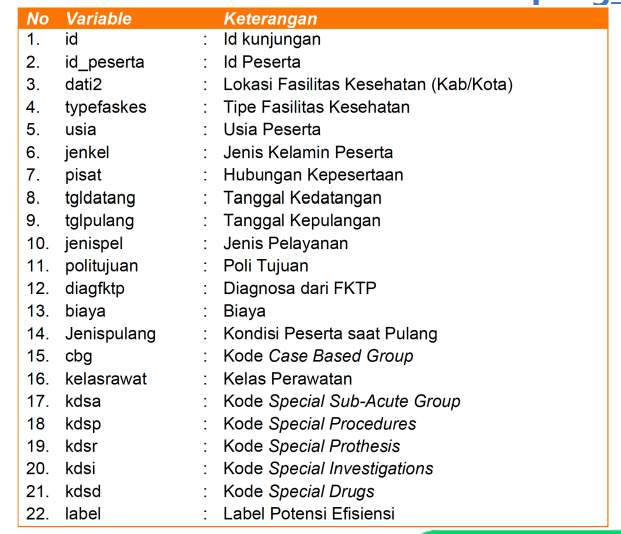

In [46]:
df.describe()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
data_type,int64,int64,int64,string,int64,string,float64,string,string,int64,...,float64,float64,string,int64,string,string,string,string,string,int64
count,11401882,11401882,11401882,11401882,11401882,11401833,11401692,11401882,11401882,11401882,...,11344067,11401843,11401882,11401882,14883,74517,8538,11359,154090,11401882
NA,0,0,0,0,0,49,190,0,0,0,...,57815,39,0,0,11386999,11327365,11393344,11390523,11247792,0
mean,5712719.902465224,4199294.393911374,182.5299193589269,--,37.056899992474925,--,2.498203512250638,--,--,1.6455437795269237,...,2146848.771842938,1.0945962858811509,--,2.7846950178926604,--,--,--,--,--,0.013759921388416403
std,3298534.717968,2436248.842344,106.135201,--,22.921875,--,1.390863,--,--,0.478348,...,5207576.726626,0.513155,--,0.551147,--,--,--,--,--,0.116493
min,1,1,1,--,0,--,1.0,--,--,1,...,0.0,1.0,--,1,--,--,--,--,--,0
max,11426957,8527919,528,--,110,--,5.0,--,--,2,...,401696600.0,5.0,--,3,--,--,--,--,--,1


### Drop Column

In [4]:
%%time

df = df.drop(['id_peserta','cbg', 'kdsa', 'kdsp', 'kdsr', 'kdsi', 'kdsd'])


CPU times: total: 0 ns
Wall time: 2.68 ms


In [5]:
df.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label
data_type,int64,int64,string,int64,string,float64,string,string,int64,string,string,float64,float64,int64,int64
count,11401882,11401882,11401882,11401882,11401833,11401692,11401882,11401882,11401882,7360427,11399352,11344067,11401843,11401882,11401882
NA,0,0,0,0,49,190,0,0,0,4041455,2530,57815,39,0,0
mean,5712719.902465224,182.5299193589269,--,37.056899992474925,--,2.498203512250638,--,--,1.6455437795269237,--,--,2146848.771842938,1.0945962858811509,2.7846950178926604,0.013759921388416403
std,3298534.717968,106.135201,--,22.921875,--,1.390863,--,--,0.478348,--,--,5207576.726626,0.513155,0.551147,0.116493
min,1,1,--,0,--,1.0,--,--,1,--,--,0.0,1.0,1,0
max,11426957,528,--,110,--,5.0,--,--,2,--,--,401696600.0,5.0,3,1


Kolom yang perlu diperhatikan data kosongnya:
- Poli Tujuan
- Biaya
- diagfktp


In [6]:
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,3,0
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,1,0
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,3,0
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,3,0
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,3,0
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,2,0
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,3,0
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,3,0


In [7]:
df['tgl_datang_clean'] = df['tgldatang'].str.replace('Z', '')
df['tgl_pulang_clean'] = df['tglpulang'].str.replace('Z', '')
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,tgl_datang_clean,tgl_pulang_clean
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,3,0,2018-07-25T17:00:00.000,2018-07-25T17:00:00.000
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,1,0,2019-05-27T17:00:00.000,2019-05-30T17:00:00.000
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,3,0,2019-07-16T17:00:00.000,2019-07-16T17:00:00.000
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,3,0,2019-10-17T17:00:00.000,2019-10-17T17:00:00.000
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,3,0,2018-04-18T17:00:00.000,2018-04-18T17:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,3,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,2,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,3,0,2020-12-30T17:00:00.000,2021-01-06T17:00:00.000
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,3,0,2020-12-29T17:00:00.000,2020-12-31T17:00:00.000


In [8]:
df['datang_dt'] = df['tgl_datang_clean'].astype('datetime64[ns]')
df['pulang_dt'] = df['tgl_pulang_clean'].astype('datetime64[ns]')
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,tgl_datang_clean,tgl_pulang_clean,datang_dt,pulang_dt
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,3,0,2018-07-25T17:00:00.000,2018-07-25T17:00:00.000,2018-07-25 17:00:00,2018-07-25 17:00:00
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,1,0,2019-05-27T17:00:00.000,2019-05-30T17:00:00.000,2019-05-27 17:00:00,2019-05-30 17:00:00
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,3,0,2019-07-16T17:00:00.000,2019-07-16T17:00:00.000,2019-07-16 17:00:00,2019-07-16 17:00:00
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,3,0,2019-10-17T17:00:00.000,2019-10-17T17:00:00.000,2019-10-17 17:00:00,2019-10-17 17:00:00
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,3,0,2018-04-18T17:00:00.000,2018-04-18T17:00:00.000,2018-04-18 17:00:00,2018-04-18 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,3,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,2,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,3,0,2020-12-30T17:00:00.000,2021-01-06T17:00:00.000,2020-12-30 17:00:00,2021-01-06 17:00:00
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,3,0,2020-12-29T17:00:00.000,2020-12-31T17:00:00.000,2020-12-29 17:00:00,2020-12-31 17:00:00


In [9]:
df['durasi_rawat'] = (df['pulang_dt'] - df['datang_dt']).astype('timedelta64[D]').astype('int')
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,tgl_datang_clean,tgl_pulang_clean,datang_dt,pulang_dt,durasi_rawat
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,3,0,2018-07-25T17:00:00.000,2018-07-25T17:00:00.000,2018-07-25 17:00:00,2018-07-25 17:00:00,0
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,1,0,2019-05-27T17:00:00.000,2019-05-30T17:00:00.000,2019-05-27 17:00:00,2019-05-30 17:00:00,3
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,3,0,2019-07-16T17:00:00.000,2019-07-16T17:00:00.000,2019-07-16 17:00:00,2019-07-16 17:00:00,0
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,3,0,2019-10-17T17:00:00.000,2019-10-17T17:00:00.000,2019-10-17 17:00:00,2019-10-17 17:00:00,0
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,3,0,2018-04-18T17:00:00.000,2018-04-18T17:00:00.000,2018-04-18 17:00:00,2018-04-18 17:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,3,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00,4
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,2,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00,4
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,3,0,2020-12-30T17:00:00.000,2021-01-06T17:00:00.000,2020-12-30 17:00:00,2021-01-06 17:00:00,7
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,3,0,2020-12-29T17:00:00.000,2020-12-31T17:00:00.000,2020-12-29 17:00:00,2020-12-31 17:00:00,2


In [10]:
df.info()

column,type,unit,description,expression
id,int64,,,
dati2,int64,,,
typefaskes,str,,,
usia,int64,,,
jenkel,str,,,
pisat,float64,,,
tgldatang,str,,,
tglpulang,str,,,
jenispel,int64,,,
politujuan,str,,,


In [58]:
df[df['durasi_rawat'] == 1431].head(10)


#,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
0,30308,6774414,6,B,15,L,4,1,--,M48.46,4.0542e+06,1,1,0,1431


In [11]:
%%time
df = df.drop(['tgldatang', 'tglpulang', 'tgl_datang_clean', 'tgl_pulang_clean', 'datang_dt', 'pulang_dt'])

CPU times: total: 0 ns
Wall time: 2.89 ms


In [12]:
df

#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
0,165666,17,KL,48,P,1.0,2,THT,L02.8,184300.0,1.0,3,0,0
1,1010828,17,A,63,L,1.0,1,--,R23.1,10628400.0,1.0,1,0,3
2,166042,17,KL,53,P,1.0,2,INT,E10.5,187300.0,1.0,3,0,0
3,168937,17,KL,54,P,1.0,2,MAT,H54.2,187300.0,1.0,3,0,0
4,1005899,17,A,53,P,1.0,2,SAR,M54.5,381600.0,1.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,1,--,Z71.8,3645100.0,1.0,3,0,4
"11,401,878",11053870,233,A,0,P,4.0,1,--,P59.9,12273200.0,1.0,2,0,4
"11,401,879",7461049,118,B,0,L,4.0,1,--,P24.8,4099000.0,1.0,3,0,7
"11,401,880",1075162,101,SC,0,L,5.0,1,--,P03,3992400.0,1.0,3,0,2


In [13]:
%%time

df.describe()


CPU times: total: 22.4 s
Wall time: 4.95 s


,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int32
count,11401882,11401882,11401882,11401882,11401833,11401692,11401882,7360427,11399352,11344067,11401843,11401882,11401882,11401882
NA,0,0,0,0,49,190,0,4041455,2530,57815,39,0,0,0
mean,5712719.902465224,182.5299193589269,--,37.056899992474925,--,2.498203512250638,1.6455437795269237,--,--,2146848.771842938,1.0945962858811509,2.7846950178926604,0.013759921388416403,1.5249625456569362
std,3298534.717968,106.135201,--,22.921875,--,1.390863,0.478348,--,--,5207576.726626,0.513155,0.551147,0.116493,5.294597
min,1,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0
max,11426957,528,--,110,--,5.0,2,--,--,401696600.0,5.0,3,1,1431


In [14]:
df.export_csv("sampling1.csv")  

## Pembersihan Tahap 1

In [91]:
%%time

df_sampling1 = vaex.from_csv('sampling1.csv', convert=True, chunk_size=100_000)
df_sampling1

CPU times: total: 15.6 ms
Wall time: 27.7 ms


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
0,165666,17,KL,48,P,1.0,2,THT,L02.8,184300.0,1.0,3,0,0
1,1010828,17,A,63,L,1.0,1,--,R23.1,10628400.0,1.0,1,0,3
2,166042,17,KL,53,P,1.0,2,INT,E10.5,187300.0,1.0,3,0,0
3,168937,17,KL,54,P,1.0,2,MAT,H54.2,187300.0,1.0,3,0,0
4,1005899,17,A,53,P,1.0,2,SAR,M54.5,381600.0,1.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,1,--,Z71.8,3645100.0,1.0,3,0,4
"11,401,878",11053870,233,A,0,P,4.0,1,--,P59.9,12273200.0,1.0,2,0,4
"11,401,879",7461049,118,B,0,L,4.0,1,--,P24.8,4099000.0,1.0,3,0,7
"11,401,880",1075162,101,SC,0,L,5.0,1,--,P03,3992400.0,1.0,3,0,2


In [22]:
df_sampling1.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64
count,11401882,11401882,11401882,11401882,11401833,11401692,11401882,7360427,11399352,11344067,11401843,11401882,11401882,11401882
NA,0,0,0,0,49,190,0,4041455,2530,57815,39,0,0,0
mean,5712719.902465224,182.5299193589269,--,37.056899992474925,--,2.498203512250638,1.6455437795269237,--,--,2146848.771842938,1.0945962858811509,2.7846950178926604,0.013759921388416403,1.5249625456569362
std,3298534.717968,106.135201,--,22.921875,--,1.390863,0.478348,--,--,5207576.726626,0.513155,0.551147,0.116493,5.294597
min,1,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0
max,11426957,528,--,110,--,5.0,2,--,--,401696600.0,5.0,3,1,1431


In [76]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    11244993
1      156889
dtype: int64

### Melihat Nilai Unique Kolom Pilihan

In [17]:
%%time
df_selected = df_sampling1[['dati2', 'typefaskes', 'jenkel', 'pisat', 'jenispel', 'politujuan', 'jenispulang', 'kelasrawat', 'label', 'durasi_rawat']]


CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
%%time

for col in df_selected.get_column_names():
    print(f"Kolom: {col}")
    print(df_selected[col].unique())
    print("-" * 30)


Kolom: dati2
[378, 257, 349, 238, 475, 517, 516, 96, 15, 185, 199, 232, 30, 489, 374, 105, 470, 198, 508, 404, 69, 180, 6, 380, 163, 208, 413, 461, 443, 77, 60, 97, 260, 226, 348, 501, 90, 80, 471, 210, 159, 245, 394, 396, 66, 202, 102, 132, 322, 358, 368, 26, 54, 116, 215, 189, 449, 414, 223, 108, 353, 510, 485, 377, 209, 386, 151, 150, 328, 520, 463, 389, 39, 376, 451, 143, 165, 291, 436, 94, 13, 153, 320, 1, 113, 174, 117, 194, 314, 329, 341, 225, 395, 28, 375, 101, 111, 263, 359, 236, 58, 305, 7, 138, 129, 441, 453, 357, 424, 212, 17, 178, 36, 289, 231, 268, 62, 82, 264, 157, 345, 44, 496, 269, 4, 71, 261, 273, 360, 18, 115, 130, 287, 2, 402, 29, 342, 235, 121, 182, 239, 49, 444, 407, 100, 147, 207, 252, 379, 290, 297, 227, 411, 363, 128, 493, 259, 188, 522, 367, 393, 141, 206, 244, 33, 445, 37, 12, 160, 277, 106, 511, 347, 419, 352, 488, 299, 313, 495, 527, 61, 55, 169, 229, 48, 220, 166, 271, 294, 27, 3, 76, 187, 283, 230, 450, 486, 216, 325, 276, 526, 346, 179, 45, 197, 78, 200,

### Hapus Baris Kosong

#### Jenis Kelamin

In [92]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['jenkel'].isna()].count()


CPU times: total: 141 ms
Wall time: 92.4 ms


array(48, dtype=int64)

In [94]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['jenkel'].isna()].count()


CPU times: total: 78.1 ms
Wall time: 77.6 ms


array(1, dtype=int64)

In [95]:
df_sampling1 = df_sampling1[(df_sampling1['label'] == 0) & (df_sampling1['jenkel'].notna())]



In [96]:
df_sampling1['jenkel'].isna().sum()

array(0, dtype=int64)

#### Hubungan Kepersertaan

In [98]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['pisat'].isna()].count()


CPU times: total: 328 ms
Wall time: 112 ms


array(190, dtype=int64)

In [99]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['pisat'].isna()].count()


CPU times: total: 203 ms
Wall time: 143 ms


array(0, dtype=int64)

In [101]:
%%time

df_sampling1 = df_sampling1[(df_sampling1['label'] == 0) & (df_sampling1['pisat'].notna())]

df_sampling1['pisat'].isna().sum()



CPU times: total: 766 ms
Wall time: 304 ms


array(0, dtype=int64)

#### Jenis Pulang

In [102]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['jenispulang'].isna()].count()


CPU times: total: 297 ms
Wall time: 130 ms


array(39, dtype=int64)

In [103]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['jenispulang'].isna()].count()


CPU times: total: 609 ms
Wall time: 151 ms


array(0, dtype=int64)

In [104]:
%%time

df_sampling1 = df_sampling1[(df_sampling1['label'] == 0) & (df_sampling1['jenispulang'].notna())]
df_sampling1['jenispulang'].isna().sum()



CPU times: total: 781 ms
Wall time: 355 ms


array(0, dtype=int64)

#### Diagnosa FKTP

In [106]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['diagfktp'].isna()].count()


CPU times: total: 484 ms
Wall time: 205 ms


array(2362, dtype=int64)

In [107]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['diagfktp'].isna()].count()


CPU times: total: 391 ms
Wall time: 193 ms


array(0, dtype=int64)

In [108]:
%%time

df_sampling1 = df_sampling1[(df_sampling1['label'] == 0) & (df_sampling1['diagfktp'].notna())]
df_sampling1['diagfktp'].isna().sum()



CPU times: total: 1.5 s
Wall time: 441 ms


array(0, dtype=int64)

#### Biaya

In [110]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['biaya'].isna()].count()


CPU times: total: 531 ms
Wall time: 244 ms


array(2745, dtype=int64)

In [111]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['biaya'].isna()].count()


CPU times: total: 875 ms
Wall time: 337 ms


array(0, dtype=int64)

In [115]:
%%time

df_sampling1 = df_sampling1[(df_sampling1['label'] == 0) & (df_sampling1['biaya'].notna())]
df_sampling1['biaya'].isna().sum()



CPU times: total: 656 ms
Wall time: 347 ms


array(0, dtype=int64)

#### Poli Tujuan

In [117]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['politujuan'].isna()].count()


CPU times: total: 453 ms
Wall time: 258 ms


array(3986119, dtype=int64)

In [118]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['politujuan'].isna()].count()


CPU times: total: 625 ms
Wall time: 268 ms


array(0, dtype=int64)

In [119]:
%%time

df_sampling1 = df_sampling1[(df_sampling1['label'] == 0) & (df_sampling1['politujuan'].notna())]
df_sampling1['politujuan'].isna().sum()



CPU times: total: 1.12 s
Wall time: 411 ms


array(0, dtype=int64)

In [121]:
%%time

df_sampling1.describe()

CPU times: total: 13.3 s
Wall time: 3.21 s


,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64
count,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,5615111.596326872,183.09682015140297,--,38.981125085993085,--,2.403957681061117,1.9999471978316645,--,--,421347.7360415469,1.0647500720342897,2.999966361020695,0.0,0.00023547285513594147
std,3288656.073133,106.840972,--,22.004335,--,1.375039,0.007266,--,--,1021502.062899,0.443255,0.007351,0.0,0.068946
min,2,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0
max,11426957,528,--,110,--,5.0,2,--,--,57108100.0,5.0,3,0,69


In [122]:
df_sampling1.export_csv("sampling2.csv")  

## Pembersihan Tahap 2

In [26]:
%%time

df_sampling2 = vaex.from_csv('sampling2.csv', convert=True, chunk_size=100_000)
df_sampling2

CPU times: total: 0 ns
Wall time: 32.5 ms


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
0,165666,17,KL,48,P,1.0,2,THT,L02.8,184300.0,1.0,3,0,0
1,166042,17,KL,53,P,1.0,2,INT,E10.5,187300.0,1.0,3,0,0
2,168937,17,KL,54,P,1.0,2,MAT,H54.2,187300.0,1.0,3,0,0
3,1005899,17,A,53,P,1.0,2,SAR,M54.5,381600.0,1.0,3,0,0
4,51010,8,SD,50,P,1.0,2,IGD,D61,155000.0,2.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,253,485",10985829,229,B,0,L,4.0,2,ANA,Z09.9,246000.0,1.0,3,0,0
"7,253,486",3012230,151,SC,0,P,4.0,2,ANA,P00.9,308800.0,1.0,3,0,0
"7,253,487",5635918,62,C,0,L,4.0,2,IGD,J80,296700.0,4.0,3,0,0
"7,253,488",2555450,136,SC,0,L,4.0,2,ANA,Z03.8,253300.0,1.0,3,0,0


In [5]:
df_sampling2.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64
count,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490,7253490
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,5615111.596326872,183.09682015140297,--,38.981125085993085,--,2.403957681061117,1.9999471978316645,--,--,421347.7360415469,1.0647500720342897,2.999966361020695,0.0,0.00023547285513594147
std,3288656.073133,106.840972,--,22.004335,--,1.375039,0.007266,--,--,1021502.062899,0.443255,0.007351,0.0,0.068946
min,2,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0
max,11426957,528,--,110,--,5.0,2,--,--,57108100.0,5.0,3,0,69


#### Jumlah Unique Value setiap Kolom

In [ ]:
df_selected1 = df_sampling2['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'jenispel', 'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'kelasrawat', 'label', 'durasi_rawat']

In [11]:
%%time

from vaex import agg

for col in df_selected1.column_names:
    print(f"\n Frekuensi nilai unik di kolom: '{col}'")
    result = df_selected1.groupby(df_selected1[col], agg.count()).sort(by='_count', ascending=False)
    print(result)



 Frekuensi nilai unik di kolom: 'dati2'
#    dati2    _count
0    113      208665
1    217      170902
2    135      144195
3    38       138222
4    90       126820
...  ...      ...
483  497      138
484  517      52
485  528      46
486  366      10
487  527      6

 Frekuensi nilai unik di kolom: 'typefaskes'
#    typefaskes    _count
0    SC            2137662
1    C             1424825
2    B             1264435
3    SB            501509
4    SD            487372
...  ...           ...
21   KO            8122
22   GD            5549
23   KT            3855
24   KU            2954
25   KK            7

 Frekuensi nilai unik di kolom: 'usia'
#    usia    _count
0    0       216384
1    54      134272
2    53      133224
3    50      132084
4    55      131606
...  ...     ...
106  104     8
107  107     8
108  109     3
109  108     2
110  110     2

 Frekuensi nilai unik di kolom: 'jenkel'
  #  jenkel      _count
  0  P          3864846
  1  L          3388644

 Frekuensi nilai u

### Perbaikan Diagnosa FKTP

In [27]:
%%time

df_sampling2['diagfktp'] = df_sampling2['diagfktp'].str.split('.').apply(lambda x: x[0] if len(x) > 0 else x)

df_sampling2.head(10)


CPU times: total: 0 ns
Wall time: 2.54 ms


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
0,165666,17,KL,48,P,1,2,THT,L02,184300,1,3,0,0
1,166042,17,KL,53,P,1,2,INT,E10,187300,1,3,0,0
2,168937,17,KL,54,P,1,2,MAT,H54,187300,1,3,0,0
3,1005899,17,A,53,P,1,2,SAR,M54,381600,1,3,0,0
4,51010,8,SD,50,P,1,2,IGD,D61,155000,2,3,0,0
5,49388,8,SD,50,P,1,2,IGD,D64,155000,2,3,0,0
6,143197,17,KI,46,P,1,2,IGD,K30,186800,1,3,0,0
7,159360,17,KL,59,L,1,2,MAT,Z01,187300,1,3,0,0
8,1057379,17,B,60,L,1,2,GND,K04,211400,1,3,0,0
9,170597,17,KL,47,P,1,2,MAT,H11,184300,1,3,0,0


In [28]:
%%time

def classify_diag(code):
    if code is None:
        return 'Unknown'

    code = code.upper()

    prefix = code[:1]
    try:
        number = int(''.join(filter(str.isdigit, code[:3])))
    except:
        return 'Invalid'

    if 'A00' <= code[:3] <= 'B99':
        return "Certain infectious and parasitic diseases"
    elif 'C00' <= code[:3] <= 'D48':
        return "Neoplasms"
    elif 'D50' <= code[:3] <= 'D89':
        return "Diseases of the blood and immune system"
    elif 'E00' <= code[:3] <= 'E90':
        return "Endocrine, nutritional and metabolic diseases"
    elif 'F00' <= code[:3] <= 'F99':
        return "Mental and behavioural disorders"
    elif 'G00' <= code[:3] <= 'G99':
        return "Diseases of the nervous system"
    elif 'H00' <= code[:3] <= 'H59':
        return "Diseases of the eye and adnexa"
    elif 'H60' <= code[:3] <= 'H95':
        return "Diseases of the ear and mastoid process"
    elif 'I00' <= code[:3] <= 'I99':
        return "Diseases of the circulatory system"
    elif 'J00' <= code[:3] <= 'J99':
        return "Diseases of the respiratory system"
    elif 'K00' <= code[:3] <= 'K93':
        return "Diseases of the digestive system"
    elif 'L00' <= code[:3] <= 'L99':
        return "Diseases of the skin and subcutaneous tissue"
    elif 'M00' <= code[:3] <= 'M99':
        return "Diseases of the musculoskeletal system"
    elif 'N00' <= code[:3] <= 'N99':
        return "Diseases of the genitourinary system"
    elif 'O00' <= code[:3] <= 'O99':
        return "Pregnancy, childbirth and the puerperium"
    elif 'P00' <= code[:3] <= 'P96':
        return "Perinatal conditions"
    elif 'Q00' <= code[:3] <= 'Q99':
        return "Congenital malformations"
    elif 'R00' <= code[:3] <= 'R99':
        return "Symptoms, signs, and abnormal findings"
    elif 'S00' <= code[:3] <= 'T98':
        return "Injury and external causes"
    elif 'V01' <= code[:3] <= 'Y98':
        return "External causes of morbidity and mortality"
    elif 'Z00' <= code[:3] <= 'Z99':
        return "Factors influencing health status"
    elif 'U00' <= code[:3] <= 'U85':
        return "Codes for special purposes"
    else:
        return "Uncategorized"


CPU times: total: 0 ns
Wall time: 0 ns


In [29]:
%%time

df_sampling2['diagfktp'] = df_sampling2['diagfktp'].apply(classify_diag)

df_sampling2

CPU times: total: 0 ns
Wall time: 0 ns


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,253,485",10985829,229,B,0,L,4.0,2,ANA,Factors influencing health status,246000.0,1.0,3,0,0
"7,253,486",3012230,151,SC,0,P,4.0,2,ANA,Perinatal conditions,308800.0,1.0,3,0,0
"7,253,487",5635918,62,C,0,L,4.0,2,IGD,Diseases of the respiratory system,296700.0,4.0,3,0,0
"7,253,488",2555450,136,SC,0,L,4.0,2,ANA,Factors influencing health status,253300.0,1.0,3,0,0


In [32]:
import numpy as np

# Evaluasi hasil apply ke dalam array numpy
kategori_array = df_sampling2['diagfktp'].to_numpy()

# Tambahkan sebagai kolom permanen
df_sampling2.add_column('diagfktp', kategori_array)


In [33]:
sample_value = df_sampling2['diagfktp'].values[:5][0]
print(sample_value)
print(type(sample_value))

Diseases of the skin and subcutaneous tissue
<class 'pyarrow.lib.StringScalar'>


In [39]:
df_sampling2.export_csv("sampling3.csv")  

# Diagnosa

Sampling_Healthkathon_Diagnosa, merupakan data yang berisi diagnosa penyakit peserta, di mana dalam satu
kunjungan peserta bisa memiliki lebih dari satu diagnosa. Terdiri dari 1 (satu) diagnosa primer dan atau satu atau
lebih diagnosa sekunder. Diagnosa menggunakan ICD-10: https://icd.who.int/browse10/2016/en#/

In [34]:
%%time
df_diagnosa = vaex.from_csv('sampling_healthkathon2022_diagnosa.csv', convert=True, chunk_size=100_000)
df_diagnosa

CPU times: total: 15.6 ms
Wall time: 81.9 ms


#,id,diag,levelid
0,6,O06.9,1
1,57,J02.9,1
2,91,R10.1,1
3,109,R18,1
4,111,N81.3,1
...,...,...,...
"17,308,531",11426947,K30,2
"17,308,532",11426947,E78.0,2
"17,308,533",11426947,I21.9,1
"17,308,534",11426952,K30,1


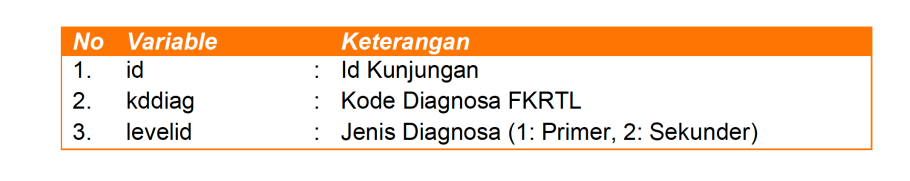

In [35]:
%%time

df_diagnosa.info()

CPU times: total: 0 ns
Wall time: 9.93 ms


In [36]:
%%time

df_diagnosa.describe()

CPU times: total: 4.22 s
Wall time: 986 ms


,id,diag,levelid
data_type,int64,string,int64
count,17308536,17308536,17308536
NA,0,0,0
mean,5851993.047998051,--,1.3411758799242177
std,3283869.871846,--,0.474104
min,1,--,1
max,11426957,--,2


In [37]:
%%time

df_diagnosa['diag'] = df_diagnosa['diag'].str.split('.').apply(lambda x: x[0] if len(x) > 0 else x)

df_diagnosa.head(10)


CPU times: total: 0 ns
Wall time: 1.52 ms


#,id,diag,levelid
0,6,O06,1
1,57,J02,1
2,91,R10,1
3,109,R18,1
4,111,N81,1
5,111,O86,2
6,127,M54,1
7,133,K30,2
8,133,E11,1
9,135,O21,1


In [28]:
df_diagnosa['diag'].unique()


['L01',
 'N18',
 'Q66',
 'O64',
 'S99',
 'L52',
 'F03',
 'D09',
 'G24',
 'I71',
 'M84',
 'C64',
 'S59',
 'R98',
 'K28',
 'R69',
 'I40',
 'E71',
 'C33',
 'E00',
 'A79',
 'H67',
 'G73',
 'W02',
 'X27',
 'V94',
 'G63',
 'O34',
 'K05',
 'R04',
 'I25',
 'L91',
 'Z00',
 'F84',
 'Q50',
 'J93',
 'T82',
 'H95',
 'W27',
 'C52',
 'B48',
 'G52',
 'C81',
 'C23',
 'Y58',
 'R75',
 'V48',
 'F13',
 'q21',
 'T42',
 'Z84',
 'X37',
 's05',
 'j44',
 'C12',
 'X60',
 'E65',
 'W92',
 'i47',
 'P07',
 'F45',
 'K35',
 'S22',
 'Q28',
 'S80',
 'S13',
 'M60',
 'M20',
 'W57',
 'G08',
 'V23',
 'B30',
 'I37',
 'Z92',
 'R45',
 'C48',
 'A60',
 'B70',
 'W39',
 'l72',
 'X76',
 'W66',
 'Y91',
 'Y20',
 'V70',
 'J20',
 'H71',
 'I12',
 'H40',
 'Q12',
 'G83',
 'L22',
 'F60',
 'Q96',
 'G10',
 'F51',
 'J11',
 'C90',
 'E23',
 'R86',
 'A38',
 'L62',
 'T97',
 'X84',
 'l84',
 '37',
 'E52',
 'e78',
 'k21',
 'Y01',
 'n19',
 'N61',
 'Z50',
 'F29',
 'N21',
 'S91',
 'D23',
 'B07',
 'O15',
 'I79',
 'O24',
 'N10',
 'I88',
 'K82',
 'S51',
 

## Perubahan code diagnosa

In [13]:
%%time

def classify_diag(code):
    if code is None:
        return 'Unknown'

    code = code.upper()
    prefix = code[:1]
    try:
        number = int(''.join(filter(str.isdigit, code[:3])))
    except:
        return 'Invalid'

    if 'A00' <= code[:3] <= 'B99':
        return "Certain infectious and parasitic diseases"
    elif 'C00' <= code[:3] <= 'D48':
        return "Neoplasms"
    elif 'D50' <= code[:3] <= 'D89':
        return "Diseases of the blood and immune system"
    elif 'E00' <= code[:3] <= 'E90':
        return "Endocrine, nutritional and metabolic diseases"
    elif 'F00' <= code[:3] <= 'F99':
        return "Mental and behavioural disorders"
    elif 'G00' <= code[:3] <= 'G99':
        return "Diseases of the nervous system"
    elif 'H00' <= code[:3] <= 'H59':
        return "Diseases of the eye and adnexa"
    elif 'H60' <= code[:3] <= 'H95':
        return "Diseases of the ear and mastoid process"
    elif 'I00' <= code[:3] <= 'I99':
        return "Diseases of the circulatory system"
    elif 'J00' <= code[:3] <= 'J99':
        return "Diseases of the respiratory system"
    elif 'K00' <= code[:3] <= 'K93':
        return "Diseases of the digestive system"
    elif 'L00' <= code[:3] <= 'L99':
        return "Diseases of the skin and subcutaneous tissue"
    elif 'M00' <= code[:3] <= 'M99':
        return "Diseases of the musculoskeletal system"
    elif 'N00' <= code[:3] <= 'N99':
        return "Diseases of the genitourinary system"
    elif 'O00' <= code[:3] <= 'O99':
        return "Pregnancy, childbirth and the puerperium"
    elif 'P00' <= code[:3] <= 'P96':
        return "Perinatal conditions"
    elif 'Q00' <= code[:3] <= 'Q99':
        return "Congenital malformations"
    elif 'R00' <= code[:3] <= 'R99':
        return "Symptoms, signs, and abnormal findings"
    elif 'S00' <= code[:3] <= 'T98':
        return "Injury and external causes"
    elif 'V01' <= code[:3] <= 'Y98':
        return "External causes of morbidity and mortality"
    elif 'Z00' <= code[:3] <= 'Z99':
        return "Factors influencing health status"
    elif 'U00' <= code[:3] <= 'U85':
        return "Codes for special purposes"
    else:
        return "Uncategorized"


CPU times: total: 0 ns
Wall time: 0 ns


In [39]:
%%time

df_diagnosa['diag'] = df_diagnosa['diag'].apply(classify_diag)

CPU times: total: 0 ns
Wall time: 1.18 ms


In [40]:
%%time
df_diagnosa.head(10)


CPU times: total: 0 ns
Wall time: 983 µs


#,id,diag,levelid
0,6,"Pregnancy, childbirth and the puerperium",1
1,57,Diseases of the respiratory system,1
2,91,"Symptoms, signs, and abnormal findings",1
3,109,"Symptoms, signs, and abnormal findings",1
4,111,Diseases of the genitourinary system,1
5,111,"Pregnancy, childbirth and the puerperium",2
6,127,Diseases of the musculoskeletal system,1
7,133,Diseases of the digestive system,2
8,133,"Endocrine, nutritional and metabolic diseases",1
9,135,"Pregnancy, childbirth and the puerperium",1


## Drop Duplicate Diagnosa

In [44]:
%%time
columns_to_check = ['id', 'diag', 'levelid']

CPU times: total: 0 ns
Wall time: 0 ns


In [45]:
%%time

all_columns = df_diagnosa.get_column_names()

CPU times: total: 0 ns
Wall time: 1.42 ms


In [46]:
%%time

agg_dict = {col: vaex.agg.first(col) for col in all_columns}

CPU times: total: 0 ns
Wall time: 7.6 ms


In [47]:
%%time

# Konversi ke Pandas
df_diag_pandas = df_diagnosa.to_pandas_df()

# Hapus duplikat
df_diag_pandas_unique = df_diag_pandas.drop_duplicates(subset=columns_to_check)

# Konversi kembali ke Vaex
df_diag_unique = vaex.from_pandas(df_diag_pandas_unique)


CPU times: total: 32.6 s
Wall time: 2min 14s


In [49]:
%%time

df_diag_unique.info()

CPU times: total: 15.6 ms
Wall time: 95.8 ms


In [50]:
df_diag_unique.export_csv("df_diag.csv")  

In [51]:
%%time

df_diagg = vaex.from_csv('df_diag.csv', convert=True, chunk_size=100_000)
df_diagg

CPU times: total: 22.5 s
Wall time: 1min 12s


#,id,diag,levelid
0,6,"Pregnancy, childbirth and the puerperium",1
1,57,Diseases of the respiratory system,1
2,91,"Symptoms, signs, and abnormal findings",1
3,109,"Symptoms, signs, and abnormal findings",1
4,111,Diseases of the genitourinary system,1
...,...,...,...
"16,633,677",11426947,Diseases of the digestive system,2
"16,633,678",11426947,"Endocrine, nutritional and metabolic diseases",2
"16,633,679",11426947,Diseases of the circulatory system,1
"16,633,680",11426952,Diseases of the digestive system,1



# Procedure

Sampling_Healthkathon_Procedure, berupakan data yang berisi prosedur/tindakan medis yang didapatkan peserta
JKN. Dalam setiap kunjungan, peserta bisa mendapatkan satu atau lebih prosedur/tindakan medis.
Prosedur/tindakan medis menggunakan ICD9-CM: http://www.icd9data.com/2012/Volume3/default.htm

In [19]:
%%time

df_procedure = vaex.from_csv('sampling_healthkathon2022_procedure.csv', convert=True, chunk_size=100_000)
df_procedure

CPU times: total: 0 ns
Wall time: 11.5 ms


#,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
"12,202,866",11426915,93.57
"12,202,867",11426927,89.52
"12,202,868",11426927,96.55
"12,202,869",11426927,87.39


In [26]:
%%time

df_procedure_pandas = pd.read_csv('sampling_healthkathon2022_procedure.csv', chunksize=100_000)
df_procedure_pandas = pd.concat(df_procedure_pandas, ignore_index=True)
df_procedure_pandas

CPU times: total: 4.53 s
Wall time: 6.32 s


,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
12202866,11426915,93.57
12202867,11426927,89.52
12202868,11426927,96.55
12202869,11426927,87.39


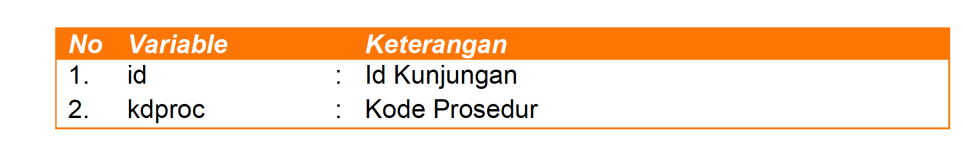

In [20]:
%%time
df_procedure.info()

CPU times: total: 0 ns
Wall time: 7.31 ms


In [ ]:
%%time

df_procedure_pandas.info()

In [22]:
df_procedure.describe()

,id,proc
data_type,int64,string
count,12202871,12202871
NA,0,0
mean,6296676.710889101,--
std,3401134.187489,--
min,1,--
max,11426953,--


In [23]:
%%time

df_procedure['proc_code'] = df_procedure['proc'].str.split('.').apply(lambda x: x[0] if len(x) > 0 else x)
# df_procedure['proc_code_detail'] = df_procedure['proc'].str.split('.').apply(lambda x: x[1] if len(x) > 0 else x)

df_procedure.head(10)


CPU times: total: 0 ns
Wall time: 0 ns


#,id,proc,proc_code
0,6,90.59,90
1,6,69.01,69
2,6,88.78,88
3,27,90.59,90
4,27,88.78,88
5,29,88.76,88
6,30,90.59,90
7,33,90.59,90
8,33,74,74
9,56,90.59,90


In [24]:
%%time

print(df_procedure.head(10)) 
print(df_procedure.info())  


  #    id    proc    proc_code
  0     6   90.59           90
  1     6   69.01           69
  2     6   88.78           88
  3    27   90.59           90
  4    27   88.78           88
  5    29   88.76           88
  6    30   90.59           90
  7    33   90.59           90
  8    33   74              74
  9    56   90.59           90


None
CPU times: total: 0 ns
Wall time: 39.3 ms


In [25]:
%%time
df_procedure['proc_code'] = df_procedure['proc_code'].evaluate() 


CPU times: total: 2.16 s
Wall time: 39.3 s


In [99]:
df_procedure.export_csv("df_procedure.csv")  

## Mengubah Kategori Procedure

In [124]:
df_proc = vaex.from_csv('df_procedure.csv', convert=True, chunk_size=100_000)
df_proc

#,id,proc,proc_code
0,6,90.59,90
1,6,69.01,69
2,6,88.78,88
3,27,90.59,90
4,27,88.78,88
...,...,...,...
"12,202,866",11426915,93.57,93
"12,202,867",11426927,89.52,89
"12,202,868",11426927,96.55,96
"12,202,869",11426927,87.39,87


In [125]:
df_proc = df_proc.drop('proc')

In [ ]:
df_proc['proc_code'].unique()


['61',
 '27',
 '37',
 '69',
 '98',
 '75',
 '04',
 '12',
 '45',
 '86',
 '59',
 '28',
 '90',
 '62',
 '78',
 '20',
 '51',
 '70',
 '01',
 '83',
 '32',
 '93',
 '67',
 '09',
 '42',
 '15',
 '54',
 '88',
 '39',
 'D72',
 'A24',
 '25',
 '5',
 '80',
 '31',
 'Z27',
 '77',
 '06',
 'Z37',
 '47',
 '-',
 '10',
 '57',
 'J44',
 '96',
 'O80',
 '60',
 '18',
 '26',
 '34',
 '99',
 '68',
 'S90',
 '72',
 '03',
 'M17',
 '13',
 '44',
 '85',
 '91',
 '65',
 '79',
 '23',
 '52',
 'A59',
 '71',
 '00',
 'I21',
 'Z04',
 '49',
 '82',
 '33',
 '66',
 '08',
 'P59',
 '16',
 '41',
 'Z09',
 '55',
 '94',
 'A31',
 'G62',
 '24',
 '4',
 '36',
 '74',
 '05',
 '11',
 '46',
 '87',
 '29',
 '58',
 '97',
 '63',
 'J81',
 '19',
 'G54',
 '21',
 '50',
 '35',
 '73',
 '02',
 'V58',
 'Q00',
 '84',
 '92',
 'E11',
 '64',
 '43',
 '14',
 '22',
 '53',
 '89',
 '38',
 '48',
 '81',
 '30',
 'Z24',
 '76',
 '07',
 '40',
 '17',
 '56',
 'G93',
 '95']

In [130]:
# Pastikan nilai None diubah ke string kosong agar bisa diproses
df_proc['proc_code'] = df_proc['proc_code'].fillna('')

# Hapus semua karakter selain angka
df_proc['proc_code_clean'] = df_proc['proc_code'].str.replace(r'[^0-9]', '', regex=True)

df_proc = df_proc[df_proc['proc_code_clean'] != '']

# Tampilkan hasil
print(df_proc[['proc_code', 'proc_code_clean']])


#           proc_code    proc_code_clean
0           90           90
1           69           69
2           88           88
3           90           90
4           88           88
...         ...          ...
12,120,158  93           93
12,120,159  89           89
12,120,160  96           96
12,120,161  87           87
12,120,162  93           93


In [131]:
df_proc['proc_code_clean'].unique()


['61',
 '27',
 '37',
 '69',
 '98',
 '75',
 '04',
 '45',
 '12',
 '86',
 '28',
 '59',
 '90',
 '62',
 '78',
 '51',
 '20',
 '70',
 '01',
 '83',
 '32',
 '93',
 '67',
 '09',
 '42',
 '15',
 '54',
 '39',
 '88',
 '25',
 '5',
 '80',
 '31',
 '06',
 '77',
 '47',
 '10',
 '57',
 '96',
 '60',
 '18',
 '26',
 '34',
 '99',
 '68',
 '03',
 '72',
 '13',
 '44',
 '85',
 '91',
 '65',
 '79',
 '23',
 '52',
 '71',
 '00',
 '49',
 '82',
 '33',
 '66',
 '08',
 '16',
 '41',
 '55',
 '94',
 '24',
 '4',
 '36',
 '74',
 '05',
 '46',
 '11',
 '87',
 '58',
 '29',
 '97',
 '63',
 '19',
 '21',
 '50',
 '35',
 '73',
 '02',
 '84',
 '92',
 '64',
 '43',
 '14',
 '22',
 '53',
 '89',
 '38',
 '48',
 '81',
 '30',
 '76',
 '07',
 '40',
 '17',
 '56',
 '95']

In [132]:
def categorize_prod(proc_code_clean):
    proc_code_clean = int(proc_code_clean) 
    if 0 <= proc_code_clean <= 0:
        return "Procedures And Interventions, Not Elsewhere Classified"
    elif 1 <= proc_code_clean <= 5:
        return "Operations On The Nervous System"
    elif 6 <= proc_code_clean <= 7:
        return "Operations On The Endocrine System"
    elif 8 <= proc_code_clean <= 16:
        return "Operations On The Eye"
    elif 17 <= proc_code_clean <= 17:
        return "Other Miscellaneous Diagnostic And Therapeutic Procedures"
    elif 18 <= proc_code_clean <= 20:
        return "Operations On The Ear"
    elif 21 <= proc_code_clean <= 29:
        return "Operations On The Nose, Mouth, And Pharynx"
    elif 30 <= proc_code_clean <= 34:
        return "Operations On The Respiratory System"
    elif 35 <= proc_code_clean <= 39:
        return "Operations On The Cardiovascular System"
    elif 40 <= proc_code_clean <= 41:
        return "Operations On The Hemic And Lymphatic System"
    elif 42 <= proc_code_clean <= 54:
        return "Operations On The Digestive System"
    elif 55 <= proc_code_clean <= 59:
        return "Operations On The Urinary System"
    elif 60 <= proc_code_clean <= 64:
        return "Operations On The Male Genital Organs"
    elif 65 <= proc_code_clean <= 71:
        return "Operations On The Female Genital Organs"
    elif 72 <= proc_code_clean <= 75:
        return "Obstetrical Procedures"
    elif 76 <= proc_code_clean <= 84:
        return "Operations On The Musculoskeletal System"
    elif 85 <= proc_code_clean <= 86:
        return "Operations On The Integumentary System"
    elif 87 <= proc_code_clean <= 99:
        return "Miscellaneous Diagnostic And Therapeutic Procedures"
    else:
        return "Unknown"
    return proc_code_clean

df_proc['proc_code_clean'] = df_proc['proc_code_clean'].apply(categorize_prod)

df_proc.head(20)


#,id,proc_code,proc_code_clean
0,6,90,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,69,Operations On The Female Genital Organs
2,6,88,'Miscellaneous Diagnostic And Therapeutic Proced...
3,27,90,'Miscellaneous Diagnostic And Therapeutic Proced...
4,27,88,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...
15,95,86,Operations On The Integumentary System
16,95,90,'Miscellaneous Diagnostic And Therapeutic Proced...
17,96,90,'Miscellaneous Diagnostic And Therapeutic Proced...
18,103,93,'Miscellaneous Diagnostic And Therapeutic Proced...


In [133]:
df_proc

#,id,proc_code,proc_code_clean
0,6,90,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,69,Operations On The Female Genital Organs
2,6,88,'Miscellaneous Diagnostic And Therapeutic Proced...
3,27,90,'Miscellaneous Diagnostic And Therapeutic Proced...
4,27,88,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...
"12,120,158",11426915,93,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,159",11426927,89,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,160",11426927,96,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,161",11426927,87,'Miscellaneous Diagnostic And Therapeutic Proced...


In [134]:
df_proc = df_proc.drop('proc_code')

In [135]:
df_proc.export_csv("df_proc.csv")

## Df_Proc

In [27]:
%%time

df_proc_detail = vaex.from_csv('df_proc.csv', convert=True, chunk_size=100_000)
df_proc_detail

CPU times: total: 0 ns
Wall time: 8.95 ms


#,id,proc_code_clean
0,6,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,Operations On The Female Genital Organs
2,6,'Miscellaneous Diagnostic And Therapeutic Proced...
3,27,'Miscellaneous Diagnostic And Therapeutic Proced...
4,27,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...
"12,120,158",11426915,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,159",11426927,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,160",11426927,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,161",11426927,'Miscellaneous Diagnostic And Therapeutic Proced...


In [28]:
%%time
print(df_proc_detail.info()) 

None
CPU times: total: 0 ns
Wall time: 11.8 ms


In [29]:
%%time

df_proc_detail.describe()

CPU times: total: 2.64 s
Wall time: 648 ms


,id,proc_code_clean
data_type,int64,string
count,12120163,12120163
NA,0,0
mean,6295004.569171058,--
std,3405249.523927,--
min,1,--
max,11426953,--


In [30]:
%%time

df_proc_detail['proc_code_clean'].unique()


CPU times: total: 3.86 s
Wall time: 3.27 s


['Operations On The Endocrine System',
 'Operations On The Urinary System',
 'Operations On The Nervous System',
 'Operations On The Ear',
 'Other Miscellaneous Diagnostic And Therapeutic Procedures',
 'Operations On The Integumentary System',
 'Operations On The Digestive System',
 'Operations On The Male Genital Organs',
 'Operations On The Musculoskeletal System',
 'Operations On The Cardiovascular System',
 'Operations On The Nose, Mouth, And Pharynx',
 'Operations On The Respiratory System',
 'Obstetrical Procedures',
 'Procedures And Interventions, Not Elsewhere Classified',
 'Miscellaneous Diagnostic And Therapeutic Procedures',
 'Operations On The Hemic And Lymphatic System',
 'Operations On The Eye',
 'Operations On The Female Genital Organs']

In [31]:
%%time
# Pastikan kolom yang digunakan memiliki tipe data yang didukung
df_proc_detail['id'] = df_proc_detail['id'].astype('int32')
df_proc_detail['proc_code_clean'] = df_proc_detail['proc_code_clean'].astype('string')

CPU times: total: 0 ns
Wall time: 4.59 ms


In [32]:
%%time
columns_to_check = ['id', 'proc_code_clean']

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
%%time

all_columns = df_proc_detail.get_column_names()

CPU times: total: 0 ns
Wall time: 0 ns


In [34]:
%%time

agg_dict = {col: vaex.agg.first(col) for col in all_columns}

CPU times: total: 0 ns
Wall time: 0 ns


## Drop Duplicate Procedure

In [35]:
import pandas as pd

In [37]:
%%time

# Konversi ke Pandas
df_pandas = df_proc_detail.to_pandas_df()

# Hapus duplikat
df_pandas_unique = df_pandas.drop_duplicates(subset=columns_to_check)

# Konversi kembali ke Vaex
df_unique = vaex.from_pandas(df_pandas_unique)

CPU times: total: 7.62 s
Wall time: 10.1 s


In [61]:
df_unique.export('df_procc.csv')

In [62]:
grouped = df_unique.groupby(by=columns_to_check, agg='count')
duplicates = grouped[grouped['count'] > 1]

if len(duplicates) == 0:
    print("Tidak ada duplikat lagi.")
else:
    print("Masih ada duplikat.")

Tidak ada duplikat lagi.


## Df_Procc

In [ ]:
%%time

df_proc_detaill = vaex.from_csv('df_procc.csv', convert=True, chunk_size=100_000)
df_proc_detaill

CPU times: total: 31.2 ms
Wall time: 98.7 ms


#,id,proc_code_clean
0,6,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,Operations On The Female Genital Organs
2,27,'Miscellaneous Diagnostic And Therapeutic Proced...
3,29,'Miscellaneous Diagnostic And Therapeutic Proced...
4,30,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...
"7,314,121",11426788,'Miscellaneous Diagnostic And Therapeutic Proced...
"7,314,122",11426822,"Operations On The Nose, Mouth, And Pharynx"
"7,314,123",11426839,Operations On The Nervous System
"7,314,124",11426915,'Miscellaneous Diagnostic And Therapeutic Proced...


In [12]:
%%time
df_proc_detaill.describe()

CPU times: total: 1.73 s
Wall time: 307 ms


,id,proc_code_clean
data_type,int64,string
count,7314126,7314126
NA,0,0
mean,6009937.476780685,--
std,3349211.104976,--
min,1,--
max,11426953,--


# Gabungan Diagnosa dan Procedure

In [76]:
%%time

df_diagg = vaex.from_csv('df_diag.csv', convert=True, chunk_size=100_000)
df_diagg

CPU times: total: 0 ns
Wall time: 25.7 ms


#,id,diag,levelid
0,6,"Pregnancy, childbirth and the puerperium",1
1,57,Diseases of the respiratory system,1
2,91,"Symptoms, signs, and abnormal findings",1
3,109,"Symptoms, signs, and abnormal findings",1
4,111,Diseases of the genitourinary system,1
...,...,...,...
"16,633,677",11426947,Diseases of the digestive system,2
"16,633,678",11426947,"Endocrine, nutritional and metabolic diseases",2
"16,633,679",11426947,Diseases of the circulatory system,1
"16,633,680",11426952,Diseases of the digestive system,1


In [77]:
%%time

df_diagg['id'].nunique()


CPU times: total: 5.11 s
Wall time: 5.5 s


11403151

In [78]:
%%time

df_procc = vaex.from_csv('df_procc.csv', convert=True, chunk_size=100_000)
df_procc

CPU times: total: 0 ns
Wall time: 19.7 ms


#,id,proc_code_clean
0,6,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,Operations On The Female Genital Organs
2,27,'Miscellaneous Diagnostic And Therapeutic Proced...
3,29,'Miscellaneous Diagnostic And Therapeutic Proced...
4,30,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...
"7,314,121",11426788,'Miscellaneous Diagnostic And Therapeutic Proced...
"7,314,122",11426822,"Operations On The Nose, Mouth, And Pharynx"
"7,314,123",11426839,Operations On The Nervous System
"7,314,124",11426915,'Miscellaneous Diagnostic And Therapeutic Proced...


In [56]:
%%time

df_procc['id'].nunique()

CPU times: total: 2.09 s
Wall time: 2.93 s


6372051

## Join

### Left Join

In [72]:
%%time

df_joined_left = df_diagg.join(df_procc, on='id', how='left', allow_duplication=True)


CPU times: total: 11.3 s
Wall time: 3.5 s


In [73]:
df_joined_left.describe()

,id,diag,levelid,proc_code_clean
data_type,int64,string,int64,string
count,18562625,18562625,18562625,11797786
NA,0,0,0,6764839
mean,5895714.318841489,--,1.3349366266893825,--
std,3298396.976522,--,0.471968,--
min,1,--,1,--
max,11426957,--,2,--


In [74]:
%%time

df_joined_right = df_diagg.join(df_procc, on='id', how='right', allow_duplication=True)


CPU times: total: 19.1 s
Wall time: 8.77 s


In [75]:
%%time

df_joined_right.describe()

CPU times: total: 4.78 s
Wall time: 2.93 s


,id,proc_code_clean,diag,levelid
data_type,int64,string,string,int64
count,11797786,11797786,11797786,11797786
NA,0,0,0,0
mean,6121753.182372608,--,--,1.3800371527335722
std,3325841.539065,--,--,0.485396
min,1,--,--,1
max,11426953,--,--,2


### Inner Join

In [79]:
%%time

df_joined_inner = df_diagg.join(df_procc, on='id', how='inner', allow_duplication=True)

df_joined_inner.describe()


CPU times: total: 16 s
Wall time: 10.3 s


,id,diag,levelid,proc_code_clean
data_type,int64,string,int64,string
count,11797786,11797786,11797786,11797786
NA,0,0,0,0
mean,6121753.182372608,--,1.3800371527335722,--
std,3325841.539066,--,0.485396,--
min,1,--,1,--
max,11426953,--,2,--


In [80]:
%%time

df_joined_left.export_csv("JoinDiagProd.csv")  

CPU times: total: 36.1 s
Wall time: 2min 3s


In [37]:
%%time

df_diagprod = vaex.from_csv('JoinDiagProd.csv', convert=True, chunk_size=100_000)
df_diagprod

CPU times: total: 15.6 ms
Wall time: 107 ms


#,id,diag,levelid,proc_code_clean
0,6,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
1,57,Diseases of the respiratory system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
2,91,"Symptoms, signs, and abnormal findings",1,'Miscellaneous Diagnostic And Therapeutic Proced...
3,109,"Symptoms, signs, and abnormal findings",1,Operations On The Digestive System
4,111,Diseases of the genitourinary system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...,...
"18,562,620",2860876,"Pregnancy, childbirth and the puerperium",2,Obstetrical Procedures
"18,562,621",2860876,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
"18,562,622",2860876,"Pregnancy, childbirth and the puerperium",1,Obstetrical Procedures
"18,562,623",2860876,Factors influencing health status,2,'Miscellaneous Diagnostic And Therapeutic Proced...


# Gabungan Ketiga Tabel

In [49]:
%%time

df_sampling3 = vaex.from_csv('sampling3.csv', convert=True, chunk_size=100_000)
df_sampling3

CPU times: total: 46.9 ms
Wall time: 118 ms


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,253,485",10985829,229,B,0,L,4.0,2,ANA,Factors influencing health status,246000.0,1.0,3,0,0
"7,253,486",3012230,151,SC,0,P,4.0,2,ANA,Perinatal conditions,308800.0,1.0,3,0,0
"7,253,487",5635918,62,C,0,L,4.0,2,IGD,Diseases of the respiratory system,296700.0,4.0,3,0,0
"7,253,488",2555450,136,SC,0,L,4.0,2,ANA,Factors influencing health status,253300.0,1.0,3,0,0


In [50]:
df_sampling3.info()

column,type,unit,description,expression
id,int64,,,
dati2,int64,,,
typefaskes,str,,,
usia,int64,,,
jenkel,str,,,
pisat,float64,,,
jenispel,int64,,,
politujuan,str,,,
diagfktp,str,,,
biaya,float64,,,


In [34]:
df_sampling2['diagfktp'].unique()


['Codes for special purposes',
 'Endocrine, nutritional and metabolic diseases',
 'External causes of morbidity and mortality',
 'Diseases of the respiratory system',
 'Neoplasms',
 'Diseases of the circulatory system',
 'Mental and behavioural disorders',
 'Uncategorized',
 'Pregnancy, childbirth and the puerperium',
 'Invalid',
 'Diseases of the musculoskeletal system',
 'Injury and external causes',
 'Perinatal conditions',
 'Certain infectious and parasitic diseases',
 'Diseases of the nervous system',
 'Diseases of the ear and mastoid process',
 'Diseases of the skin and subcutaneous tissue',
 'Factors influencing health status',
 'Diseases of the genitourinary system',
 'Symptoms, signs, and abnormal findings',
 'Diseases of the eye and adnexa',
 'Diseases of the digestive system',
 'Congenital malformations',
 'Diseases of the blood and immune system']

In [58]:
df_sampling3.info()

column,type,unit,description,expression
id,int64,,,
dati2,int64,,,
typefaskes,str,,,
usia,int64,,,
jenkel,str,,,
pisat,float64,,,
jenispel,int64,,,
politujuan,str,,,
diagfktp,str,,,
biaya,float64,,,


In [ ]:
df_diagprod['diag'].unique()

['Codes for special purposes',
 'Endocrine, nutritional and metabolic diseases',
 'External causes of morbidity and mortality',
 'Diseases of the respiratory system',
 'Neoplasms',
 'Mental and behavioural disorders',
 'Diseases of the circulatory system',
 'Uncategorized',
 'Pregnancy, childbirth and the puerperium',
 'Diseases of the musculoskeletal system',
 'Injury and external causes',
 'Perinatal conditions',
 'Certain infectious and parasitic diseases',
 'Diseases of the nervous system',
 'Diseases of the ear and mastoid process',
 'Diseases of the skin and subcutaneous tissue',
 'Diseases of the genitourinary system',
 'Factors influencing health status',
 'Symptoms, signs, and abnormal findings',
 'Diseases of the eye and adnexa',
 'Diseases of the digestive system',
 'Congenital malformations',
 'Diseases of the blood and immune system']

In [59]:
df_diagprod.info()

column,type,unit,description,expression
id,int64,,,
diag,str,,,
levelid,int64,,,
proc_code_clean,str,,,
#,id,diag,levelid,proc_code_clean
0,6,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
1,57,Diseases of the respiratory system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
2,91,"Symptoms, signs, and abnormal findings",1,'Miscellaneous Diagnostic And Therapeutic Proced...
3,109,"Symptoms, signs, and abnormal findings",1,Operations On The Digestive System
4,111,Diseases of the genitourinary system,1,'Miscellaneous Diagnostic And Therapeutic Proced...


## Join

### Left Join

In [38]:
%%time

df_joined = df_sampling2.join(df_diagprod, on='id', how='left', allow_duplication=True)

CPU times: total: 17.1 s
Wall time: 7.15 s


In [47]:
df_joined.info()

column,type,unit,description,expression
id,int64,,,
dati2,int64,,,
typefaskes,str,,,
usia,int64,,,
jenkel,str,,,
pisat,float64,,,
jenispel,int64,,,
politujuan,str,,,
biaya,float64,,,
jenispulang,float64,,,


In [48]:
df_joined.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,biaya,jenispulang,kelasrawat,label,durasi_rawat,diagfktp,diag,levelid,proc_code_clean
data_type,int64,int64,string,int64,string,float64,int64,string,float64,float64,int64,int64,int64,string,string,int64,string
count,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9451189,9435385,9435385,4518026
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15804,15804,4933163
mean,5662849.1216110485,182.7732696912526,--,40.488559164354875,--,2.361896159308633,1.9999024461366712,--,416725.52143555693,1.0688730275100837,2.9999426527180866,0.0,0.00039010964652172334,--,--,1.2169982464944462,--
std,3281422.037626,105.522155,--,22.011365,--,1.365112,0.009876,--,1017960.920371,0.459278,0.009671,0.0,0.069364,--,--,0.412201,--
min,2,1,--,0,--,1.0,1,--,0.0,1.0,1,0,0,--,--,1,--
max,11426957,528,--,110,--,5.0,2,--,57108100.0,5.0,3,0,69,--,--,2,--


### Inner Join

In [49]:
%%time

df_joined_inner = df_sampling2.join(df_diagprod, on='id', how='inner', allow_duplication=True)

CPU times: total: 22.6 s
Wall time: 11.8 s


In [50]:
df_joined_inner.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,biaya,jenispulang,kelasrawat,label,durasi_rawat,diagfktp,diag,levelid,proc_code_clean
data_type,int64,int64,string,int64,string,float64,int64,string,float64,float64,int64,int64,int64,string,string,int64,string
count,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,9435385,4518026
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4917359
mean,5661742.61091646,182.73857049818318,--,40.491162045851866,--,2.3618316581676315,1.9999022827367405,--,416872.16125372733,1.068949385743136,2.99994255666303,0.0,0.00039076306902156085,--,--,1.2169982464944462,--
std,3281189.442244,105.505327,--,22.012262,--,1.365123,0.009885,--,1018336.600131,0.459569,0.009679,0.0,0.069422,--,--,0.412201,--
min,2,1,--,0,--,1.0,1,--,0.0,1.0,1,0,0,--,--,1,--
max,11426957,528,--,110,--,5.0,2,--,57108100.0,5.0,3,0,69,--,--,2,--


In [51]:
df_joined_inner.export_csv("datagabungan.csv")  

# Pengolahan Data Gabungan

In [2]:
%%time

df_gabungan = vaex.from_csv('datagabungan.csv', convert=True, chunk_size=100_000)

CPU times: total: 1.48 s
Wall time: 4.2 s


In [3]:
df_gabungan

#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,biaya,jenispulang,kelasrawat,label,durasi_rawat,diagfktp,diag,levelid,proc_code_clean
0,165666,17,KL,48,P,1.0,2,THT,184300.0,1.0,3,0,0,Diseases of the skin and subcutaneous tissue,Diseases of the ear and mastoid process,1,--
1,166042,17,KL,53,P,1.0,2,INT,187300.0,1.0,3,0,0,"Endocrine, nutritional and metabolic diseases",Diseases of the digestive system,2,--
2,168937,17,KL,54,P,1.0,2,MAT,187300.0,1.0,3,0,0,Diseases of the eye and adnexa,Diseases of the eye and adnexa,2,--
3,1005899,17,A,53,P,1.0,2,SAR,381600.0,1.0,3,0,0,Diseases of the musculoskeletal system,Diseases of the musculoskeletal system,1,--
4,51010,8,SD,50,P,1.0,2,IGD,155000.0,2.0,3,0,0,Diseases of the blood and immune system,Diseases of the blood and immune system,1,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,435,380",614697,66,C,2,L,4.0,2,ANA,183500.0,1.0,3,0,0,Factors influencing health status,"Symptoms, signs, and abnormal findings",2,--
"9,435,381",5528645,351,SB,73,L,1.0,2,SAR,204000.0,1.0,3,0,0,Diseases of the circulatory system,Factors influencing health status,1,--
"9,435,382",7970542,173,SC,26,P,4.0,2,IGD,142400.0,1.0,3,0,0,"Symptoms, signs, and abnormal findings","Symptoms, signs, and abnormal findings",1,'Miscellaneous Diagnostic And Therapeutic Proced...
"9,435,383",7970542,173,SC,26,P,4.0,2,IGD,142400.0,1.0,3,0,0,"Symptoms, signs, and abnormal findings","Symptoms, signs, and abnormal findings",2,'Miscellaneous Diagnostic And Therapeutic Proced...
